# Executive Certificate Big Data - Centrale Supelec - Octobre 2018
# Détection d’intrusion réseau à l’aide de l’apprentissage automatique
### Notebook : sp3-01_features-selection
### Auteur : Ahmed Mekaouar

# Features Selection using Random Forest

In [18]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
def model_metrics(y_test,y_test_pred):

    print( 'Accuracy: %.4f' %accuracy_score(y_test,y_test_pred))
    print( 'Precision weighted: %.4f' %precision_score(y_test,y_test_pred,average='weighted'))
    print( 'Recall weighted: %.4f' %recall_score(y_test,y_test_pred,average='weighted'))
    print( 'F1 weighted: %.4f' %f1_score(y_test,y_test_pred,average='weighted'))

In [19]:
# This code is an adpatation from "TP machine learning - executive certificate big data - Centrale Sup Elec - C. Kermorvant"
# Better display of the confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """
    #print(cm)
    plt.figure(figsize=(20,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
  
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load data

In [4]:
intermediary_data_path = os.path.join(os.path.pardir,'data','intermediary')
train_baseline_file_path = os.path.join(intermediary_data_path, 'train_baseline.csv')
train_attacks_file_path = os.path.join(intermediary_data_path, 'train_attacks.csv')

In [5]:
df = pd.concat([pd.read_csv(train_baseline_file_path ),
                pd.read_csv(train_attacks_file_path )])

In [6]:
df.drop(columns='Flow ID',inplace=True)

In [7]:
df.shape

(2517116, 69)

In [8]:
# columns names list
columns = list(df)

In [9]:
columns

['FlowDuration',
 'TotalFwdPackets',
 'TotalBackwardPackets',
 'TotalLengthofFwdPackets',
 'TotalLengthofBwdPackets',
 'FwdPacketLengthMax',
 'FwdPacketLengthMin',
 'FwdPacketLengthMean',
 'FwdPacketLengthStd',
 'BwdPacketLengthMax',
 'BwdPacketLengthMin',
 'BwdPacketLengthMean',
 'BwdPacketLengthStd',
 'FlowBytesPs',
 'FlowPackets/s',
 'FlowIATMean',
 'FlowIATStd',
 'FlowIATMax',
 'FlowIATMin',
 'FwdIATTotal',
 'FwdIATMean',
 'FwdIATStd',
 'FwdIATMax',
 'FwdIATMin',
 'BwdIATTotal',
 'BwdIATMean',
 'BwdIATStd',
 'BwdIATMax',
 'BwdIATMin',
 'FwdPSHFlags',
 'FwdURGFlags',
 'FwdHeaderLength',
 'BwdHeaderLength',
 'FwdPackets/s',
 'BwdPackets/s',
 'MinPacketLength',
 'MaxPacketLength',
 'PacketLengthMean',
 'PacketLengthStd',
 'PacketLengthVariance',
 'FINFlagCount',
 'SYNFlagCount',
 'RSTFlagCount',
 'PSHFlagCount',
 'ACKFlagCount',
 'URGFlagCount',
 'CWEFlagCount',
 'ECEFlagCount',
 'Down/UpRatio',
 'AveragePacketSize',
 'AvgFwdSegmentSize',
 'AvgBwdSegmentSize',
 'SubflowFwdPackets',
 '

In [13]:
# Split the data : 80% for RF training and 20% for eveluating the model.
# Oversampling should be done only on training data
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.20, random_state=1)

In [21]:
# I only take 10% of BENIGN traffic then use SMOTE library to fix data unbalance issue
X_train = pd.concat([X_train[X_train.Label=='BENIGN'].sample(frac=0.1,random_state=0),X_train[X_train.Label!='BENIGN']])
y_train = X_train['Label']
X_train = X_train.drop(columns=['Label'],axis=1)
# Using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_train_res = pd.DataFrame(X_train_res)
X_train_res['Label'] = y_train_res
X_train_res.columns = list(df)
X_train = X_train_res
y_train = X_train['Label']
X_train = X_train.drop(columns=['Label'],axis=1)

In [12]:
pd.Series(y_train).value_counts()

PortScan                    169129
DDoS                        169129
DoS slowloris               169129
Web Attack Brute Force      169129
SSH-Patator                 169129
Web Attack XSS              169129
Bot                         169129
FTP-Patator                 169129
DoS Hulk                    169129
Web Attack Sql Injection    169129
DoS GoldenEye               169129
BENIGN                      169129
Heartbleed                  169129
Infiltration                169129
Name: Label, dtype: int64

In [13]:
%%time
# Train the model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200,
                             n_jobs=-1,
                             random_state=0,
                             oob_score=True,
                             class_weight='balanced',
                             verbose=1)
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 22.4min finished


Wall time: 24min 39s


In [18]:
clf

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=0,
            verbose=1, warm_start=False)

In [14]:
# Save classifier
from sklearn.externals import joblib
fs_RF_model_file = os.path.join(os.path.pardir,'models','fs_RF_model_0207.pkl')
joblib.dump(clf, fs_RF_model_file) 

['..\\models\\fs_RF_model_0207.pkl']

In [10]:
# load first classifier
from sklearn.externals import joblib
first_RF_model_file = os.path.join(os.path.pardir,'models','fs_RF_model_0207.pkl')
clf = joblib.load(first_RF_model_file)

In [11]:
clf.oob_score_

0.99553975283448048

In [14]:
y_test = X_test['Label']
X_test = X_test.drop(columns=['Label'],axis=1)

In [15]:
%%time
y_test_pred = clf.predict(X_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.4s


Wall time: 17.2 s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   12.8s finished


In [18]:
# undersample majority class : 10% then oversample all remaining classes
model_metrics(y_test,y_test_pred)

Accuracy: 0.9715
Precision weighted: 0.9883
Recall weighted: 0.9715
F1 weighted: 0.9775


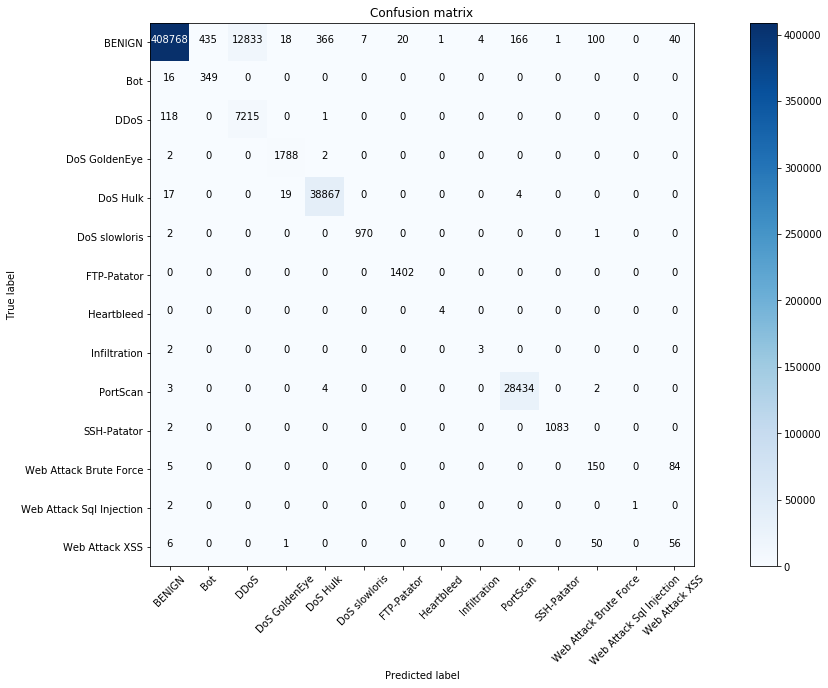

In [19]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(conf_mat,classes=sorted(y_test.unique()))

## Feature importance ranking and plot

In [22]:
# The follwing lines are adaptation of a source code from :
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = clf.feature_importances_
features_labels = X_train.columns[0:]   
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,features_labels[indices[f]],importances[indices[f]]))

 1) Init_Win_bytes_backward        0.078754
 2) Init_Win_bytes_forward         0.035087
 3) FwdPacketLengthMax             0.034939
 4) min_seg_size_forward           0.031537
 5) PacketLengthMean               0.029018
 6) SubflowFwdBytes                0.025572
 7) BwdPacketLengthMean            0.024790
 8) BwdPacketLengthMax             0.024562
 9) AvgBwdSegmentSize              0.024307
10) BwdPackets/s                   0.023839
11) FlowIATMean                    0.023653
12) BwdPacketLengthMin             0.023111
13) FlowIATMin                     0.022906
14) BwdHeaderLength                0.022014
15) FwdIATMin                      0.021740
16) TotalLengthofBwdPackets        0.021548
17) FlowPackets/s                  0.021383
18) TotalLengthofFwdPackets        0.020728
19) SubflowBwdBytes                0.019838
20) FwdIATMean                     0.019306
21) AveragePacketSize              0.018960
22) FlowDuration                   0.018541
23) MaxPacketLength             

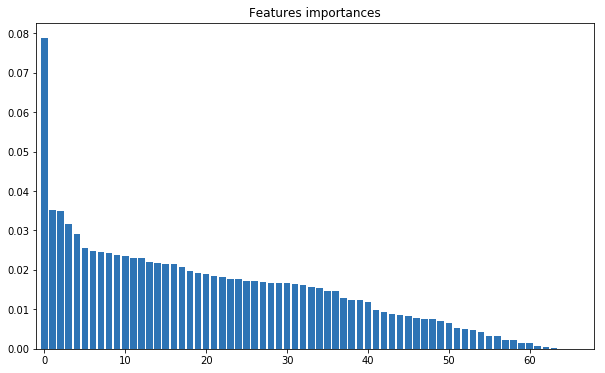

In [25]:
import matplotlib.pyplot as plt
# The follwing lines are adaptation of a source code from :
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Plot the features importances
plt.figure(figsize=(10,6))
plt.title("Features importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color='#2e74b5', align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [22]:
# I choose to remove feature with importance less than 0.01
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(clf, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)
selected_columns=[]
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                           features_labels[indices[f]], 
                           importances[indices[f]]))
    selected_columns.append(features_labels[indices[f]])

 1) Init_Win_bytes_backward        0.078754
 2) Init_Win_bytes_forward         0.035087
 3) FwdPacketLengthMax             0.034939
 4) min_seg_size_forward           0.031537
 5) PacketLengthMean               0.029018
 6) SubflowFwdBytes                0.025572
 7) BwdPacketLengthMean            0.024790
 8) BwdPacketLengthMax             0.024562
 9) AvgBwdSegmentSize              0.024307
10) BwdPackets/s                   0.023839
11) FlowIATMean                    0.023653
12) BwdPacketLengthMin             0.023111
13) FlowIATMin                     0.022906
14) BwdHeaderLength                0.022014
15) FwdIATMin                      0.021740
16) TotalLengthofBwdPackets        0.021548
17) FlowPackets/s                  0.021383
18) TotalLengthofFwdPackets        0.020728
19) SubflowBwdBytes                0.019838
20) FwdIATMean                     0.019306
21) AveragePacketSize              0.018960
22) FlowDuration                   0.018541
23) MaxPacketLength             

In [23]:
# Build a new Dataframe using selected columns + Label
selected_columns.append('Label')
df = df[selected_columns]

### Perform transformations on test csv & novelty.csv

In [24]:
test_baseline_file_path = os.path.join(intermediary_data_path, 'test_baseline.csv')
df2 = pd.read_csv(test_baseline_file_path)
df2.drop(columns='Flow ID',inplace=True)
df2 = df2[selected_columns]

test_attacks_file_path = os.path.join(intermediary_data_path, 'test_attacks.csv')
df3 = pd.read_csv(test_attacks_file_path)
df3.drop(columns='Flow ID',inplace=True)
df3 = df3[selected_columns]

novelty_file_path = os.path.join(intermediary_data_path, 'novelty.csv')
df4 = pd.read_csv(novelty_file_path)
df4.drop(columns='Flow ID',inplace=True)
df4 = df4[selected_columns]

### Save the processed data in processed path

In [26]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_baseline_train_file = os.path.join(processed_data_path, 'train_baseline.csv')
write_attacks_train_file = os.path.join(processed_data_path, 'train_attacks.csv')

write_baseline_test_file = os.path.join(processed_data_path, 'test_baseline.csv')
write_attacks_test_file = os.path.join(processed_data_path, 'test_attacks.csv')
write_novelty_file = os.path.join(processed_data_path, 'novelty.csv')

df[df.Label=='BENIGN'].to_csv(write_baseline_train_file,index=False) 
df[df.Label!='BENIGN'].to_csv(write_attacks_train_file,index=False) 
df2.to_csv(write_baseline_test_file,index=False) 
df3.to_csv(write_attacks_test_file,index=False) 
df4.to_csv(write_novelty_file,index=False) 